## Example

In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

df = load_dataset('pairfam_family')

# Show the dataframe
df

,id,weight40,sex,doby_gen,dob,ethni,migstatus,yeduc,sat1i4,sat5,...,255,256,257,258,259,260,261,262,263,264
0,111000.0,0.343964,1,1971,855,1,1,11.5,5,7,...,4,4,4,4,4,4,4,4,4,4
1,1624000.0,1.467063,1,1973,880,1,1,11.5,9,8,...,8,8,8,8,8,8,8,8,8,8
2,2767000.0,0.463918,1,1971,853,1,1,9.0,9,-2,...,8,8,8,8,8,8,8,8,8,8
3,2931000.0,1.767455,0,1973,881,5,3,10.5,5,5,...,9,9,9,9,9,9,9,9,9,9
4,3167000.0,0.884521,1,1973,883,1,1,11.5,8,10,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,919347000.0,0.964979,0,1973,880,1,1,11.5,8,4,...,1,1,1,1,1,1,1,1,1,1
1862,919488000.0,1.981277,0,1971,863,1,1,10.5,10,2,...,9,9,9,9,9,9,9,9,9,9
1863,919910000.0,0.485150,1,1973,878,1,1,20.0,7,7,...,8,8,8,8,8,8,8,8,8,8
1864,920140000.0,2.022823,0,1971,859,1,1,11.5,10,10,...,7,7,7,7,7,7,7,7,7,7


In [2]:
# 1) Define time and states (order matters!)
time_list = [f"{i}" for i in range(1, 265)]  # 264 months
states = list(range(1, 10))                  # 1..9

# 2) Human-readable labels (strings)
labels = [
    "Single, no child",
    "LAT, no child",
    "Cohabiting, no child",
    "Married, no child",
    "Single, with child(ren)",
    "LAT, with child(ren)",
    "Cohabiting, with child(ren)",
    "Married, 1 child",
    "Married, 2+ children"
]

# 3) A fresh palette (9 colors, same order as 'states')
colors_list = [
    "#74C9B4",  # fresh green
    "#A6E3D0",  # water mint
    "#F9E79F",  # pale apricot
    "#F6CDA3",  # warm light orange
    "#F5B7B1",  # soft rose
    "#D7BDE2",  # light lavender
    "#A3C4F3",  # porcelain blue
    "#7FB3D5",  # lake blue
    "#EAECEE"   # cloud white
]

sequence_data = SequenceData(
    df,
    time=time_list,
    id_col="id",
    states=states,
    labels=labels,
    # If your data do not contain weight, then no need to include the following parameter
    weights=df["weight40"].values, 
    custom_colors=colors_list
)



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1866
[>] Number of time points: 264
[>] Min/Max sequence length: 264 / 264
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[>] Labels: ['Single, no child', 'LAT, no child', 'Cohabiting, no child', 'Married, no child', 'Single, with child(ren)', 'LAT, with child(ren)', 'Cohabiting, with child(ren)', 'Married, 1 child', 'Married, 2+ children']
[>] Weights: Provided (total weight=2346.268, mean=1.257, std=1.046)


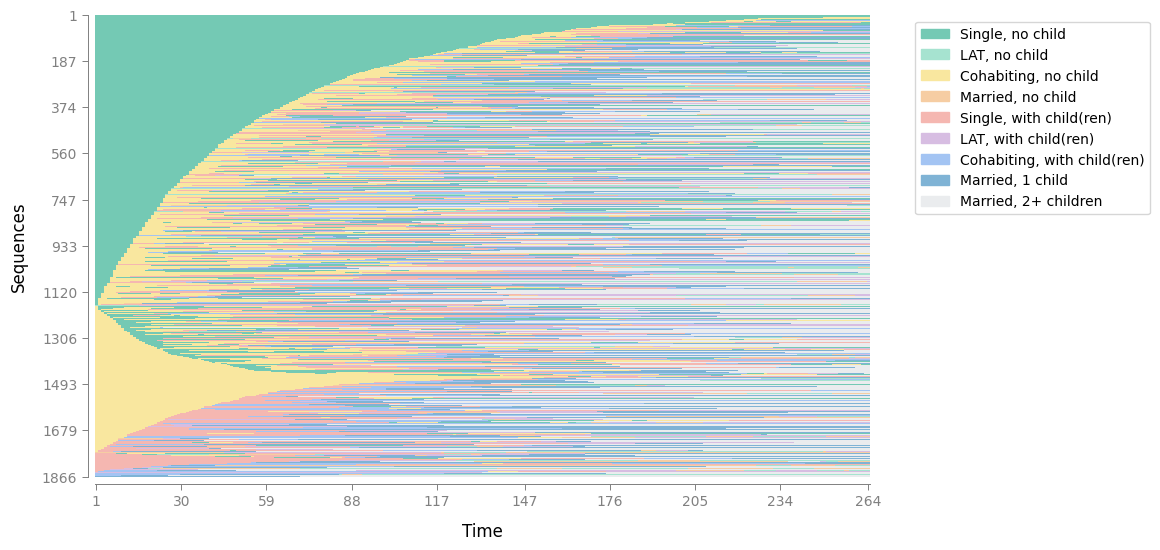

In [4]:
plot_sequence_index(sequence_data)

In [5]:
om = get_distance_matrix(seqdata=sequence_data,
                         method="OM",
                         sm="CONSTANT",
                         indel=1)
om

[>] Processing 1866 sequences with 9 unique states.
  - Creating 10x10 substitution-cost matrix using 2 as constant value
[>] Identified 1857 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,111000.0,1624000.0,2767000.0,2931000.0,3167000.0,3450000.0,3491000.0,3902000.0,4814000.0,5678000.0,...,918511000.0,918595000.0,918958000.0,919111000.0,919206000.0,919347000.0,919488000.0,919910000.0,920140000.0,920303000.0
111000.0,0.0,498.0,498.0,498.0,498.0,266.0,416.0,498.0,518.0,508.0,...,498.0,508.0,528.0,406.0,528.0,528.0,500.0,518.0,508.0,502.0
1624000.0,498.0,0.0,274.0,210.0,226.0,386.0,302.0,314.0,374.0,366.0,...,106.0,368.0,346.0,398.0,378.0,378.0,400.0,232.0,268.0,274.0
2767000.0,498.0,274.0,0.0,382.0,214.0,480.0,444.0,440.0,436.0,372.0,...,274.0,470.0,502.0,466.0,502.0,502.0,502.0,404.0,334.0,380.0
2931000.0,498.0,210.0,382.0,0.0,340.0,346.0,314.0,218.0,268.0,270.0,...,154.0,380.0,274.0,358.0,282.0,282.0,350.0,166.0,326.0,270.0
3167000.0,498.0,226.0,214.0,340.0,0.0,384.0,400.0,394.0,370.0,350.0,...,186.0,428.0,458.0,480.0,458.0,508.0,506.0,344.0,222.0,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919347000.0,528.0,378.0,502.0,282.0,508.0,508.0,374.0,378.0,476.0,184.0,...,402.0,414.0,120.0,390.0,78.0,0.0,408.0,256.0,408.0,268.0
919488000.0,500.0,400.0,502.0,350.0,506.0,390.0,380.0,352.0,424.0,404.0,...,350.0,434.0,400.0,148.0,422.0,408.0,0.0,400.0,406.0,336.0
919910000.0,518.0,232.0,404.0,166.0,344.0,420.0,272.0,260.0,314.0,262.0,...,228.0,344.0,204.0,386.0,260.0,256.0,400.0,0.0,296.0,220.0
920140000.0,508.0,268.0,334.0,326.0,222.0,454.0,238.0,308.0,372.0,272.0,...,272.0,352.0,344.0,378.0,392.0,408.0,406.0,296.0,0.0,268.0


[>] Converting DataFrame to NumPy array...


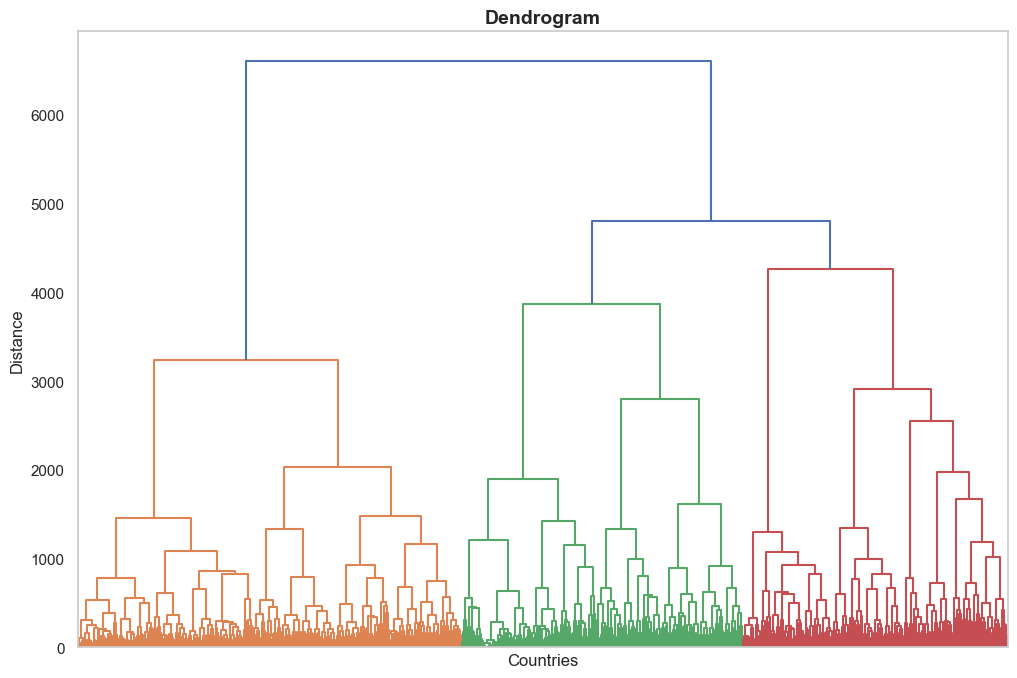

In [6]:
cluster = Cluster(om, sequence_data.ids, clustering_method='ward_d2')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")

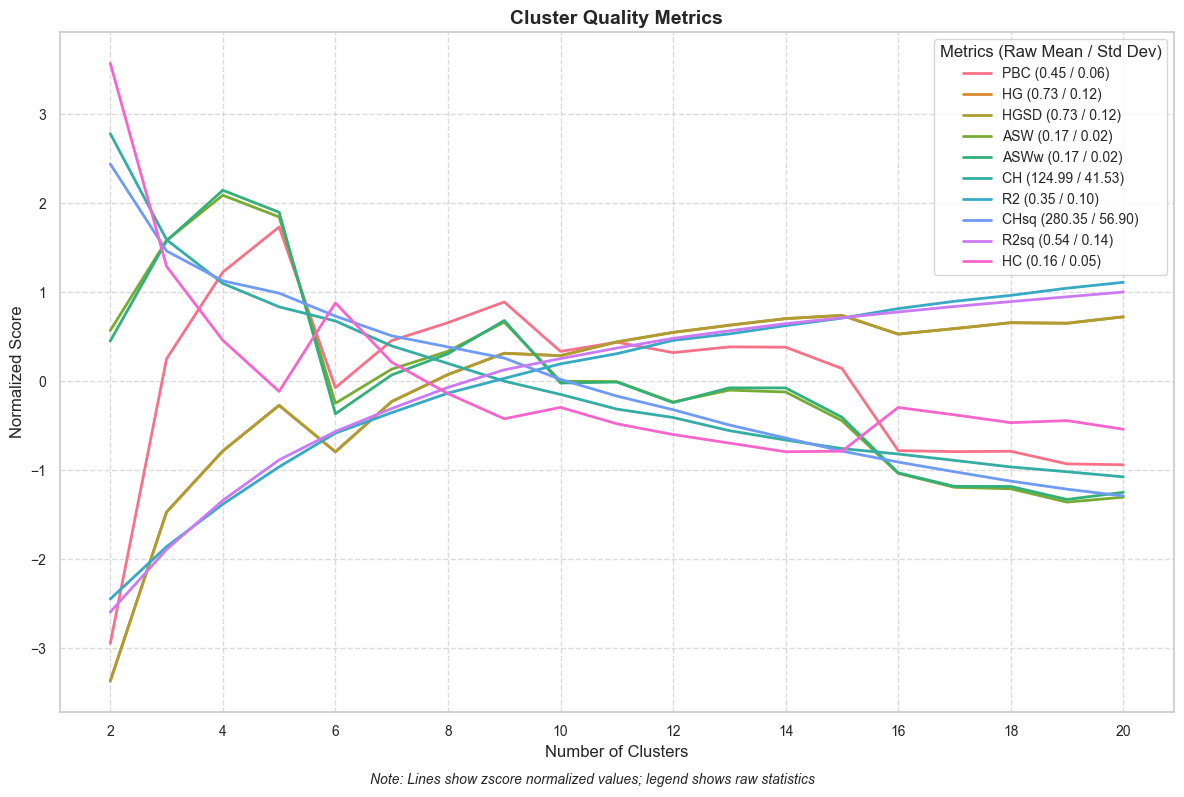

  Metric  Opt. Clusters   Raw Value  Z-Score Norm.
0    PBC              5    0.546923       1.733473
1     HG             15    0.819785       0.740056
2   HGSD             15    0.818717       0.740570
3    ASW              4    0.215993       2.090288
4   ASWw              4    0.217578       2.146402
5     CH              2  240.566323       2.782659
6     R2             20    0.452905       1.112406
7   CHsq              2  419.270292       2.441464
8   R2sq             20    0.680659       1.003220
9     HC              2    0.327980       3.573407


In [8]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_cqi_scores(norm='zscore')
summary_table = cluster_quality.get_cqi_table()
print(summary_table)

        Entity ID  Cluster
0        111000.0        4
1       1624000.0        2
2       2767000.0        3
3       2931000.0        1
4       3167000.0        4
...           ...      ...
1861  919347000.0        2
1862  919488000.0        4
1863  919910000.0        2
1864  920140000.0        4
1865  920303000.0        2

[1866 rows x 2 columns]
   Cluster  Count  Percentage
0        1    770       41.26
1        2    564       30.23
2        3    182        9.75
3        4    350       18.76


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:1033: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y=y_column, data=distribution, palette='pastel')


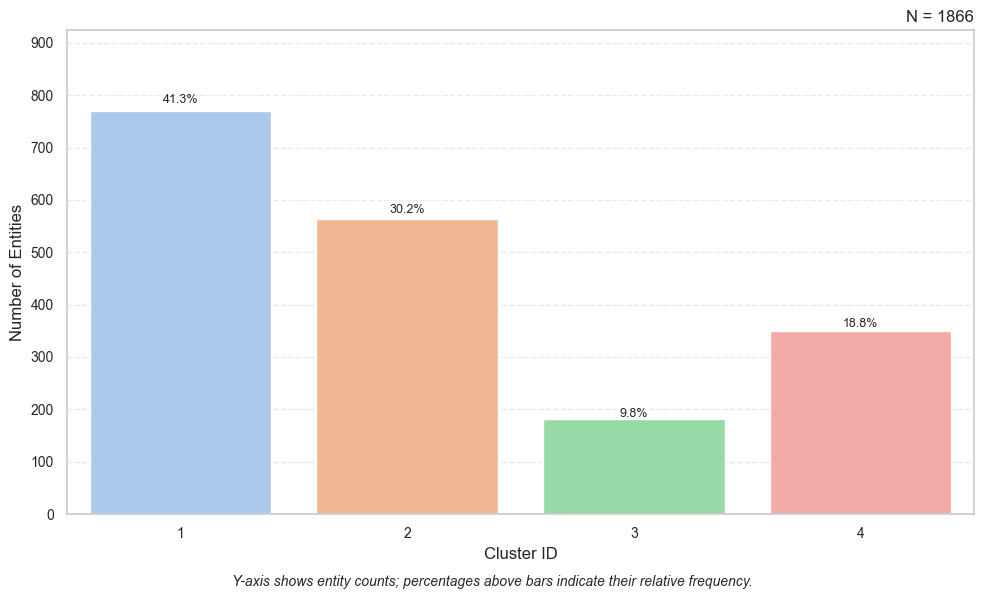

In [17]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, title=None)

In [18]:
# With original numeric labels

membership_table.rename(columns={'Entity ID': 'id'}, inplace=True)

df_with_membership = pd.merge(df, membership_table, on='id', how='left')

df_with_membership

,id,weight40,sex,doby_gen,dob,ethni,migstatus,yeduc,sat1i4,sat5,...,256,257,258,259,260,261,262,263,264,Cluster
0,111000.0,0.343964,1,1971,855,1,1,11.5,5,7,...,4,4,4,4,4,4,4,4,4,4
1,1624000.0,1.467063,1,1973,880,1,1,11.5,9,8,...,8,8,8,8,8,8,8,8,8,2
2,2767000.0,0.463918,1,1971,853,1,1,9.0,9,-2,...,8,8,8,8,8,8,8,8,8,3
3,2931000.0,1.767455,0,1973,881,5,3,10.5,5,5,...,9,9,9,9,9,9,9,9,9,1
4,3167000.0,0.884521,1,1973,883,1,1,11.5,8,10,...,8,8,8,8,8,8,8,8,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,919347000.0,0.964979,0,1973,880,1,1,11.5,8,4,...,1,1,1,1,1,1,1,1,1,2
1862,919488000.0,1.981277,0,1971,863,1,1,10.5,10,2,...,9,9,9,9,9,9,9,9,9,4
1863,919910000.0,0.485150,1,1973,878,1,1,20.0,7,7,...,8,8,8,8,8,8,8,8,8,2
1864,920140000.0,2.022823,0,1971,859,1,1,11.5,10,10,...,7,7,7,7,7,7,7,7,7,4



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1866
[>] Number of time points: 264
[>] Min/Max sequence length: 264 / 264
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[>] Labels: ['Single, no child', 'LAT, no child', 'Cohabiting, no child', 'Married, no child', 'Single, with child(ren)', 'LAT, with child(ren)', 'Cohabiting, with child(ren)', 'Married, 1 child', 'Married, 2+ children']
[>] Weights: Provided (total weight=2346.268, mean=1.257, std=1.046)
[>] Creating grouped plots by 'Cluster' with 4 categories


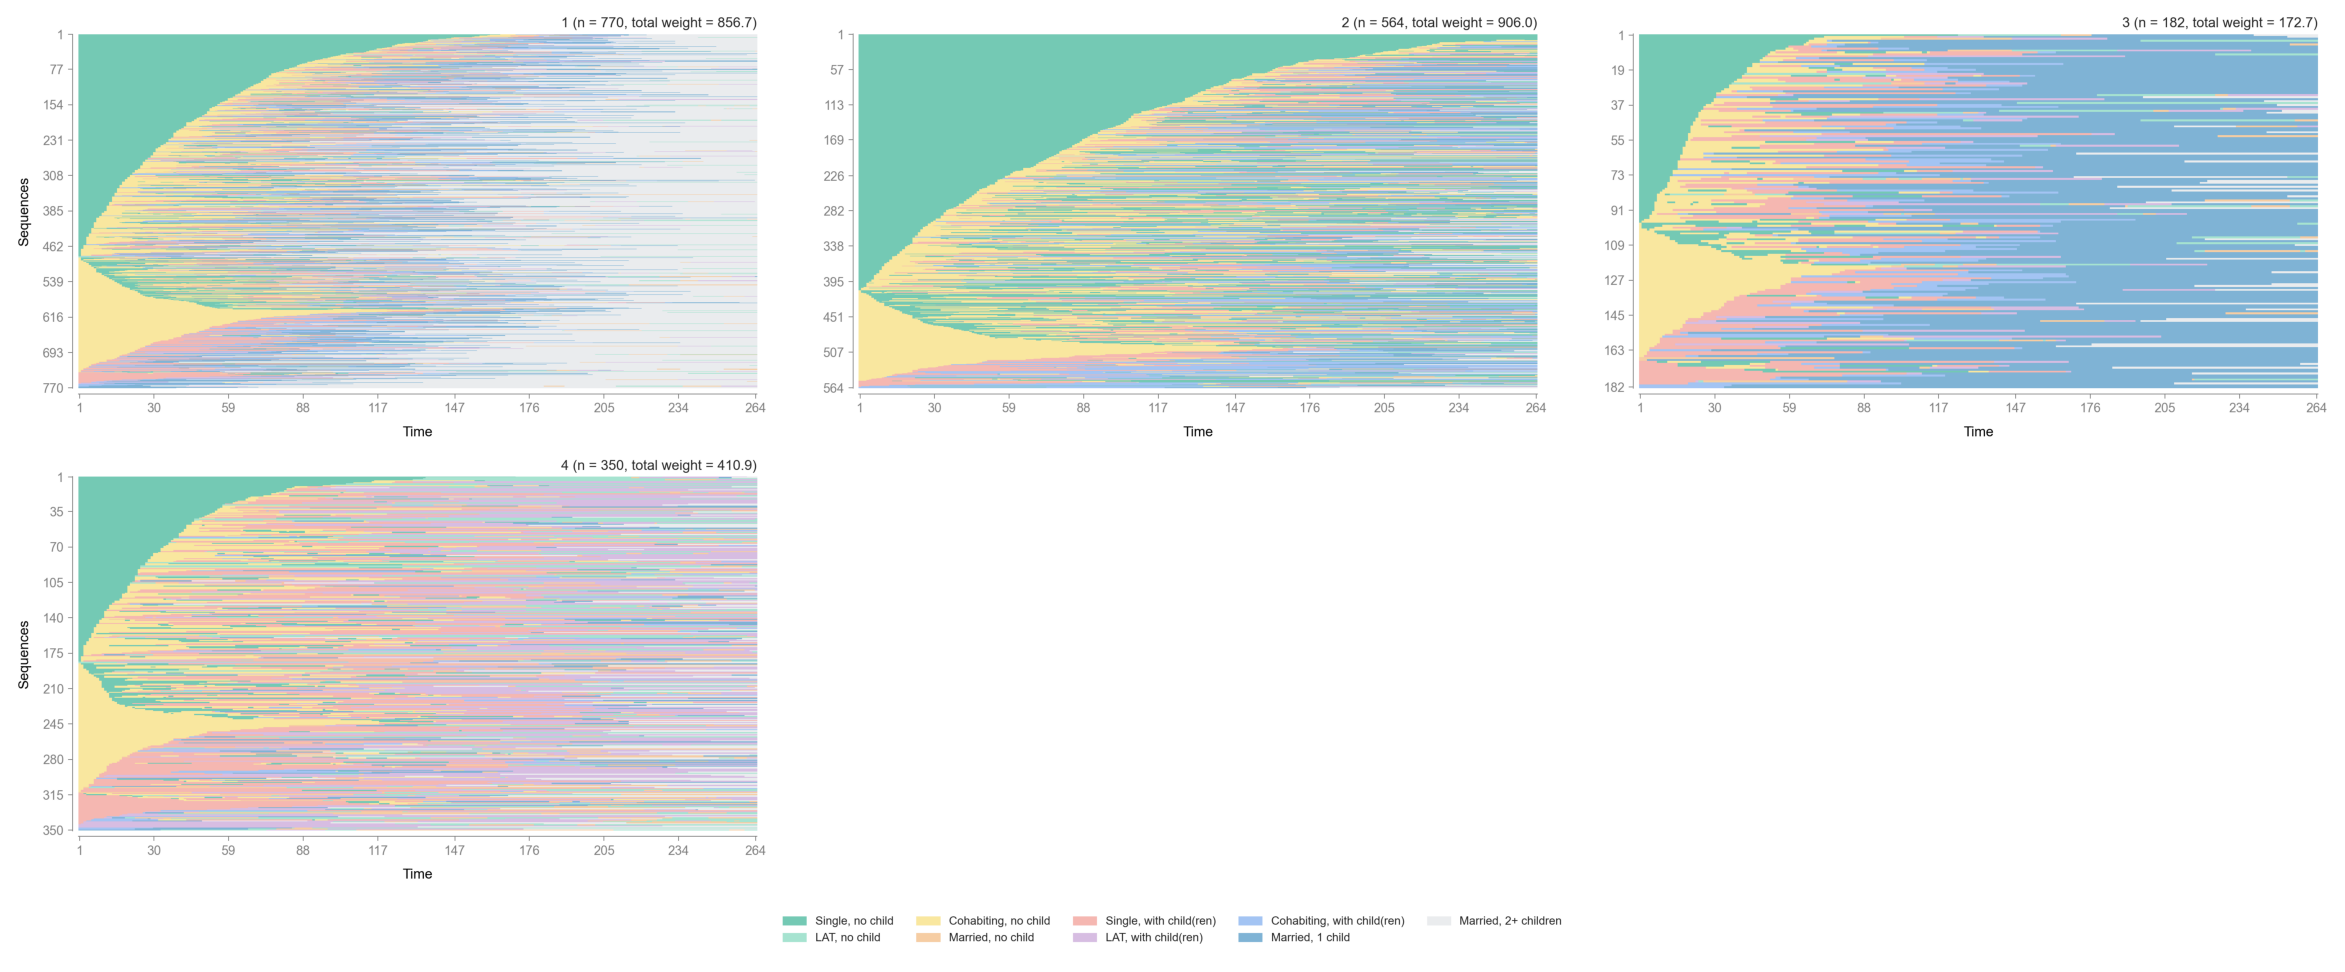

In [19]:
sequence_data_with_membership = SequenceData(
    df_with_membership,
    time=time_list,
    id_col="id",
    states=states,
    labels=labels,
    # If your data do not contain weight, then no need to include the following parameter
    weights=df["weight40"].values, 
    custom_colors=colors_list
)

plot_sequence_index(seqdata=sequence_data_with_membership,
                    id_group_df=df_with_membership,
                    show_by_category="Cluster",
                    )

In [23]:
mapping_dict = {
    1: 'Late Family Formation',
    2: 'Early Partnership and Marriage', 
    3: 'Early Marriage with Children',
    4: 'Non-Marital Family Formation',
}

# change the values of Cluster to the labels
df_with_membership['Cluster'] = df_with_membership['Cluster'].map(mapping_dict)

df_with_membership

,id,weight40,sex,doby_gen,dob,ethni,migstatus,yeduc,sat1i4,sat5,...,256,257,258,259,260,261,262,263,264,Cluster
0,111000.0,0.343964,1,1971,855,1,1,11.5,5,7,...,4,4,4,4,4,4,4,4,4,Non-Marital Family Formation
1,1624000.0,1.467063,1,1973,880,1,1,11.5,9,8,...,8,8,8,8,8,8,8,8,8,Early Partnership and Marriage
2,2767000.0,0.463918,1,1971,853,1,1,9.0,9,-2,...,8,8,8,8,8,8,8,8,8,Early Marriage with Children
3,2931000.0,1.767455,0,1973,881,5,3,10.5,5,5,...,9,9,9,9,9,9,9,9,9,Late Family Formation
4,3167000.0,0.884521,1,1973,883,1,1,11.5,8,10,...,8,8,8,8,8,8,8,8,8,Non-Marital Family Formation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,919347000.0,0.964979,0,1973,880,1,1,11.5,8,4,...,1,1,1,1,1,1,1,1,1,Early Partnership and Marriage
1862,919488000.0,1.981277,0,1971,863,1,1,10.5,10,2,...,9,9,9,9,9,9,9,9,9,Non-Marital Family Formation
1863,919910000.0,0.485150,1,1973,878,1,1,20.0,7,7,...,8,8,8,8,8,8,8,8,8,Early Partnership and Marriage
1864,920140000.0,2.022823,0,1971,859,1,1,11.5,10,10,...,7,7,7,7,7,7,7,7,7,Non-Marital Family Formation



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1866
[>] Number of time points: 264
[>] Min/Max sequence length: 264 / 264
[>] States: [1, 2, 3, 4, 5, 6, 7, 8, 9]
[>] Labels: ['Single, no child', 'LAT, no child', 'Cohabiting, no child', 'Married, no child', 'Single, with child(ren)', 'LAT, with child(ren)', 'Cohabiting, with child(ren)', 'Married, 1 child', 'Married, 2+ children']
[>] Weights: Provided (total weight=2346.268, mean=1.257, std=1.046)
[>] Creating grouped plots by 'Cluster' with 4 categories


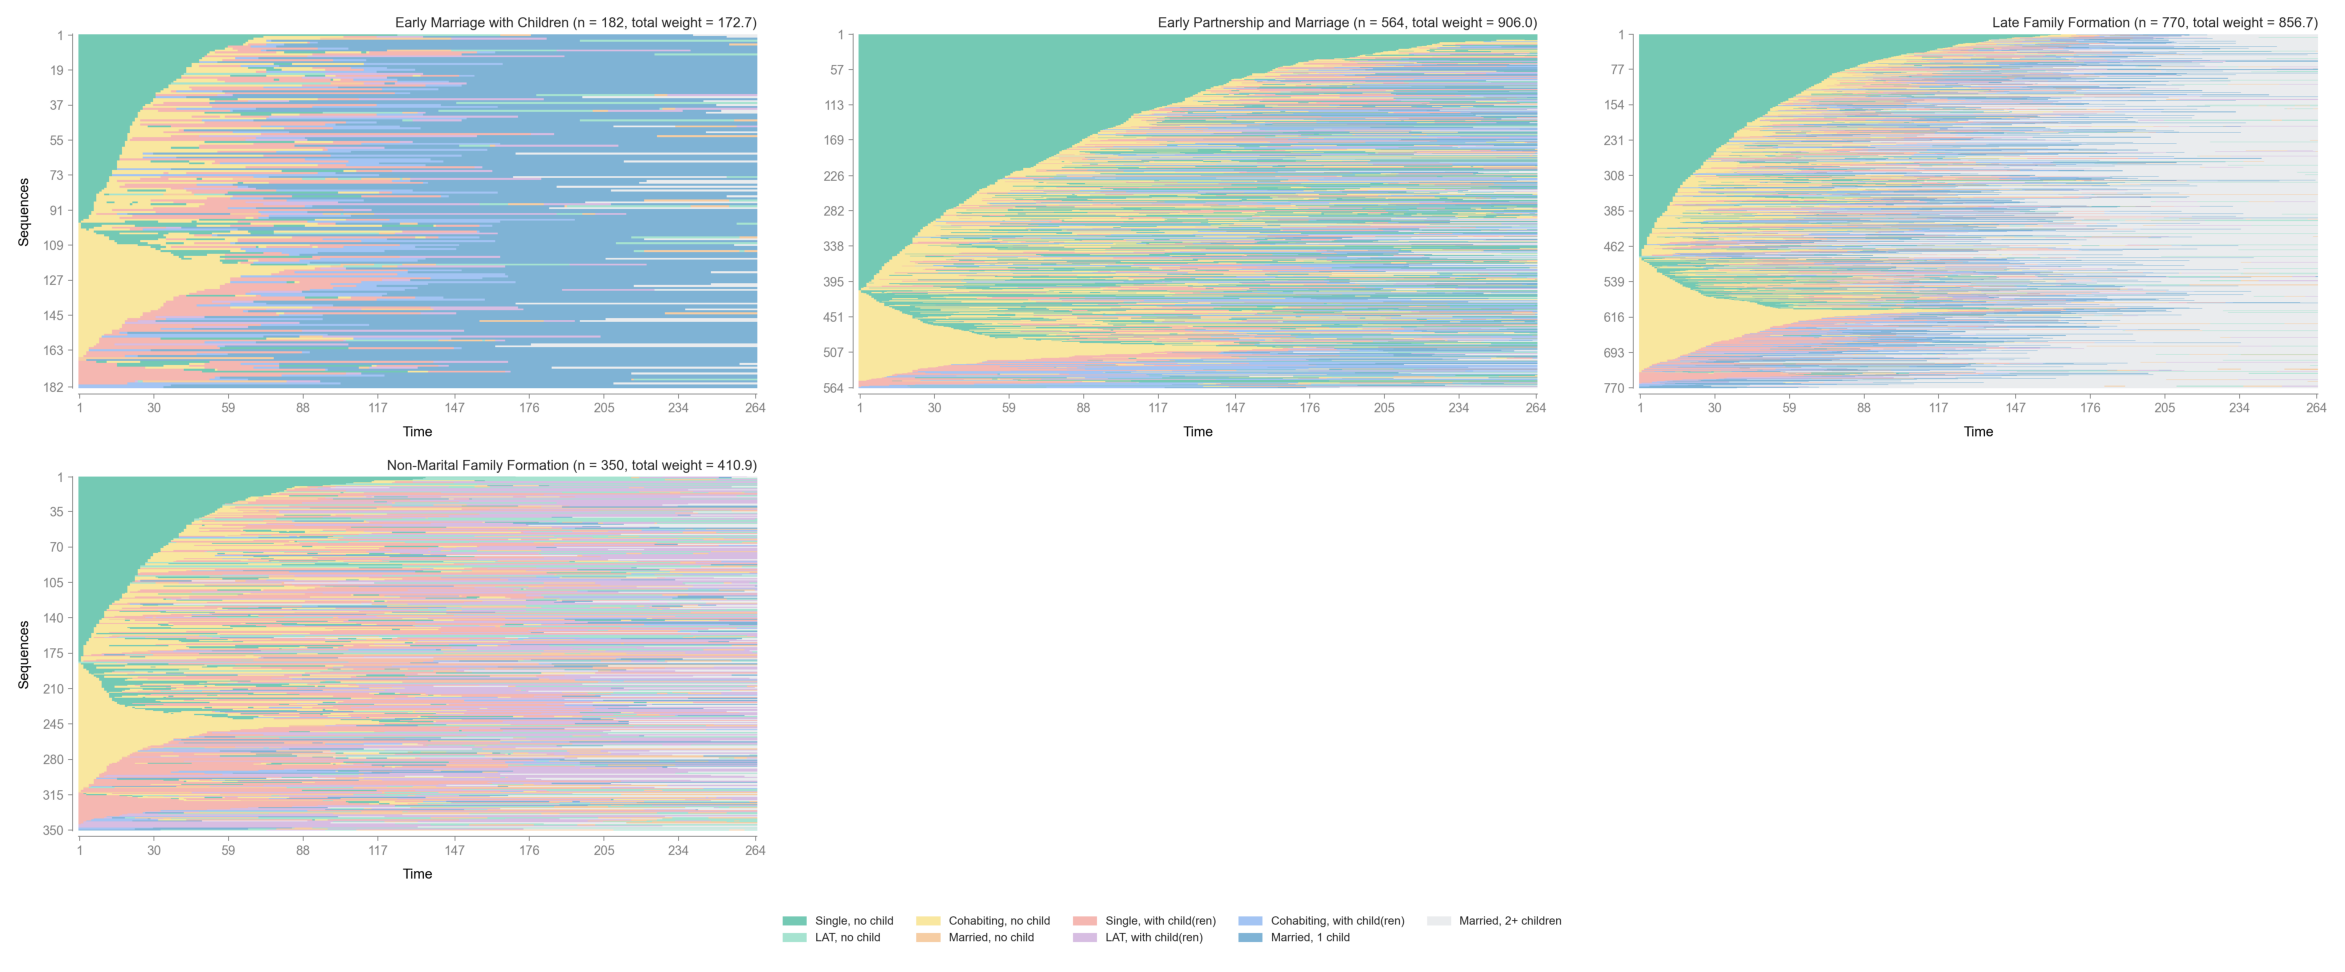

In [26]:
sequence_data_with_membership = SequenceData(
    df_with_membership,
    time=time_list,
    id_col="id",
    states=states,
    labels=labels,
    # If your data do not contain weight, then no need to include the following parameter
    weights=df["weight40"].values, 
    custom_colors=colors_list
)

plot_sequence_index(seqdata=sequence_data_with_membership,
                    id_group_df=df_with_membership,
                    show_by_category="Cluster",
                    save_as="pairfam_family_cluster_plot",
                    )

In [33]:
# Install and import rpy2 for R integration
import subprocess
import sys

# Install rpy2 if not already installed
# Note: rpy2 requires R to be installed on the system
try:
    import rpy2
    from rpy2 import robjects as ro
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.conversion import localconverter
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "rpy2"])
    import rpy2
    from rpy2 import robjects as ro
    from rpy2.robjects import pandas2ri
    from rpy2.robjects.conversion import localconverter

# Initialize R environment
r = ro.r

# Note: pandas2ri.activate() is deprecated in newer versions of rpy2
# We'll use localconverter context instead when converting data


In [34]:
# Prepare data for R analysis
# Create a clean dataset with demographic variables and cluster membership
analysis_data = df_with_membership[['id', 'sex', 'yeduc', 'east', 'ethni', 'migstatus', 'Cluster']].copy()

# Add some time-specific states (e.g., state at age 20, 30, 40)
analysis_data['state_20'] = df_with_membership['20']  # State at month 20
analysis_data['state_40'] = df_with_membership['40']  # State at month 40
analysis_data['state_60'] = df_with_membership['60']  # State at month 60

# Convert cluster to numeric for some models
cluster_mapping = {
    'Late Family Formation': 1,
    'Early Partnership and Marriage': 2, 
    'Early Marriage with Children': 3,
    'Non-Marital Family Formation': 4
}
analysis_data['cluster_numeric'] = analysis_data['Cluster'].map(cluster_mapping)

# Convert sex to factor (0=female, 1=male)
analysis_data['sex_factor'] = analysis_data['sex'].map({0: 'Female', 1: 'Male'})

print("Analysis dataset shape:", analysis_data.shape)
print("\nFirst few rows:")
print(analysis_data.head())


Analysis dataset shape: (1866, 12)

First few rows:
          id  sex  yeduc  east  ethni  migstatus  \
0   111000.0    1   11.5     1      1          1   
1  1624000.0    1   11.5     0      1          1   
2  2767000.0    1    9.0     0      1          1   
3  2931000.0    0   10.5     0      5          3   
4  3167000.0    1   11.5     0      1          1   

                          Cluster  state_20  state_40  state_60  \
0    Non-Marital Family Formation         2         4         4   
1  Early Partnership and Marriage         1         1         1   
2    Early Marriage with Children         5         5         5   
3           Late Family Formation         1         1         1   
4    Non-Marital Family Formation         3         5         5   

   cluster_numeric sex_factor  
0                4       Male  
1                2       Male  
2                3       Male  
3                1     Female  
4                4       Male  


In [36]:
# Send data to R environment using rpy2
# Convert pandas DataFrame to R data frame using the new conversion method
with localconverter(ro.default_converter + pandas2ri.converter):
    r_df_analysis = ro.conversion.py2rpy(analysis_data)
    
# Assign to R environment
ro.globalenv['df_analysis'] = r_df_analysis

print("Data successfully transferred to R environment")
print(f"R data frame dimensions: {r('dim(df_analysis)')[0]} rows, {r('dim(df_analysis)')[1]} columns")

# Set R working directory and install packages
import os
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# Set R working directory and install packages
r(f"""
# Set working directory
setwd("{current_dir}")

# Install packages if not already installed
if (!require(VGAM, quietly = TRUE)) {{
    install.packages("VGAM", repos="https://cran.r-project.org/", quiet = TRUE)
}}
if (!require(nnet, quietly = TRUE)) {{
    install.packages("nnet", repos="https://cran.r-project.org/", quiet = TRUE)
}}
if (!require(MASS, quietly = TRUE)) {{
    install.packages("MASS", repos="https://cran.r-project.org/", quiet = TRUE)
}}

# Load libraries
library(VGAM)
library(nnet)
library(MASS)

cat("R packages loaded successfully!\n")
""")


Data successfully transferred to R environment
R data frame dimensions: 1866 rows, 12 columns
Current working directory: /Library/Frameworks/R.framework/Versions/4.4-x86_64/Resources/library/file33916c182c6
R packages loaded successfully!


In [37]:
# Test R connection and data transfer
print("Testing R connection...")

# Test basic R functionality
r("""
# Test basic R operations
cat("R is working! R version:", R.version.string, "\n")
cat("Current working directory:", getwd(), "\n")
cat("Data frame summary:\n")
print(str(df_analysis))
cat("\nFirst few rows:\n")
print(head(df_analysis))
cat("\nData frame dimensions:", dim(df_analysis), "\n")
""")


Testing R connection...
R is working! R version: R version 4.4.1 (2024-06-14) 
Current working directory: /Library/Frameworks/R.framework/Versions/4.4-x86_64/Resources/library/file33916c182c6 
Data frame summary:
'data.frame':	1866 obs. of  12 variables:
 $ id             : num  111000 1624000 2767000 2931000 3167000 ...
 $ sex            : int  1 1 1 0 1 1 1 0 0 0 ...
 $ yeduc          : num  11.5 11.5 9 10.5 11.5 11.5 18 16 11.5 14 ...
 $ east           : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ethni          : int  1 1 1 5 1 -7 1 1 1 1 ...
 $ migstatus      : int  1 1 1 3 1 -7 1 1 1 1 ...
 $ Cluster        : chr  "Non-Marital Family Formation" "Early Partnership and Marriage" "Early Marriage with Children" "Late Family Formation" ...
 $ state_20       : int  2 1 5 1 3 3 1 3 3 3 ...
 $ state_40       : int  4 1 5 1 5 7 3 3 3 5 ...
 $ state_60       : int  4 1 5 1 5 8 1 1 3 5 ...
 $ cluster_numeric: int  4 2 3 1 4 4 2 1 1 2 ...
 $ sex_factor     : chr  "Male" "Male" "Male" "Female" ...
NULL



In [38]:
# Alternative: Install R packages using conda (if available)
# This is often more reliable than installing from R
try:
    import subprocess
    import sys
    
    # Try to install R packages using conda
    print("Attempting to install R packages using conda...")
    subprocess.check_call([sys.executable, "-m", "conda", "install", "-c", "conda-forge", "r-vgam", "r-nnet", "r-mass", "-y"])
    print("R packages installed successfully via conda!")
    
except Exception as e:
    print(f"Conda installation failed: {e}")
    print("Will proceed with R package installation...")


Attempting to install R packages using conda...
Conda installation failed: Command '['/opt/anaconda3/envs/dphil/bin/python', '-m', 'conda', 'install', '-c', 'conda-forge', 'r-vgam', 'r-nnet', 'r-mass', '-y']' returned non-zero exit status 1.
Will proceed with R package installation...


/opt/anaconda3/envs/dphil/bin/python: No module named conda


## VGAM Model Examples

Here are several VGAM model configurations for analyzing the pairfam family trajectory data. Each model demonstrates different ways to use cluster membership and demographic variables:

### Model 1: Cluster Membership as Dependent Variable
**Research Question**: How do demographic characteristics predict cluster membership?


In [39]:
# Model 1: Cluster membership as dependent variable
# Using VGAM multinomial logit to predict cluster membership
r("""
# Convert cluster to factor for multinomial regression
df_analysis$cluster_factor <- as.factor(df_analysis$cluster_numeric)

# Fit VGAM multinomial logit model
model1 <- vglm(cluster_factor ~ sex + yeduc + east + ethni + migstatus, 
               family = multinomial(refLevel = 1), 
               data = df_analysis)

# Print model summary
cat("=== Model 1: Cluster Membership as Dependent Variable ===\n")
cat("Research Question: How do demographic characteristics predict cluster membership?\n\n")
print(summary(model1))
""")


=== Model 1: Cluster Membership as Dependent Variable ===
Research Question: How do demographic characteristics predict cluster membership?


Call:
vglm(formula = cluster_factor ~ sex + yeduc + east + ethni + 
    migstatus, family = multinomial(refLevel = 1), data = df_analysis)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -0.75740    0.27842  -2.720 0.006522 ** 
(Intercept):2 -0.16661    0.44430  -0.375 0.707668    
(Intercept):3 -0.16814    0.34204  -0.492 0.623005    
sex:1         -0.76688    0.11386  -6.735 1.64e-11 ***
sex:2          0.37991    0.17756   2.140 0.032389 *  
sex:3          0.15975    0.13660   1.169 0.242235    
yeduc:1        0.06712    0.01871   3.588 0.000333 ***
yeduc:2       -0.13242    0.03258  -4.065 4.81e-05 ***
yeduc:3       -0.07590    0.02420  -3.137 0.001708 ** 
east:1         0.05766    0.12551   0.459 0.645960    
east:2         0.79219    0.17313   4.576 4.75e-06 ***
east:3         0.97812    0.13641   7.170 7

### Model 2: Family State as Dependent Variable with Cluster as Predictor
**Research Question**: How does cluster membership and demographics predict family state at a specific time point?


In [40]:
# Simplified VGAM model (if packages are available)
# This will only run if VGAM is successfully loaded
try:
    r("""
    # Check if VGAM is available
    if (require(VGAM, quietly = TRUE)) {
        cat("VGAM package is available! Proceeding with models...\n")
        
        # Convert cluster to factor for multinomial regression
        df_analysis$cluster_factor <- as.factor(df_analysis$cluster_numeric)
        
        # Simple multinomial logit model
        model1 <- vglm(cluster_factor ~ sex + yeduc + east + ethni, 
                       family = multinomial(refLevel = 1), 
                       data = df_analysis)
        
        cat("=== Model 1: Cluster Membership as Dependent Variable ===\n")
        print(summary(model1))
        
    } else {
        cat("VGAM package not available. Please install it first.\n")
    }
    """)
except Exception as e:
    print(f"Error running VGAM model: {e}")
    print("This might be due to R package installation issues.")


VGAM package is available! Proceeding with models...
=== Model 1: Cluster Membership as Dependent Variable ===

Call:
vglm(formula = cluster_factor ~ sex + yeduc + east + ethni, family = multinomial(refLevel = 1), 
    data = df_analysis)

Coefficients: 
              Estimate Std. Error z value Pr(>|z|)    
(Intercept):1 -0.74468    0.27862  -2.673 0.007523 ** 
(Intercept):2 -0.14970    0.44487  -0.337 0.736486    
(Intercept):3 -0.17523    0.33930  -0.516 0.605532    
sex:1         -0.76639    0.11382  -6.733 1.66e-11 ***
sex:2          0.38176    0.17757   2.150 0.031566 *  
sex:3          0.16029    0.13629   1.176 0.239552    
yeduc:1        0.06742    0.01871   3.604 0.000314 ***
yeduc:2       -0.13240    0.03261  -4.060 4.91e-05 ***
yeduc:3       -0.07460    0.02401  -3.107 0.001887 ** 
east:1         0.06216    0.12533   0.496 0.619892    
east:2         0.79466    0.17272   4.601 4.21e-06 ***
east:3         1.00009    0.13627   7.339 2.15e-13 ***
ethni:1       -0.09475    0.03

## Troubleshooting R Package Installation

If you encounter issues with R package installation, here are some solutions:

### Option 1: Install R packages via conda (Recommended)
```bash
conda install -c conda-forge r-vgam r-nnet r-mass
```

### Option 2: Install R packages directly in R
```r
install.packages(c("VGAM", "nnet", "MASS"), repos="https://cran.r-project.org/")
```

### Option 3: Use alternative Python packages
If R integration continues to have issues, you can use Python alternatives:
- `statsmodels` for multinomial logistic regression
- `scikit-learn` for classification models
- `patsy` for formula specification

### Common Issues:
1. **Working directory error**: Make sure R can access the current directory
2. **Package installation fails**: Try installing packages via conda instead of R
3. **Memory issues**: Reduce dataset size for testing


In [41]:
# Python alternative: Multinomial logistic regression using statsmodels
# This provides similar functionality to VGAM without R dependencies
try:
    import statsmodels.api as sm
    from statsmodels.formula.api import mnlogit
    import pandas as pd
    import numpy as np
    
    print("Using Python statsmodels for multinomial logistic regression...")
    
    # Prepare data for statsmodels
    model_data = analysis_data.copy()
    model_data['cluster_factor'] = model_data['cluster_numeric'].astype('category')
    
    # Fit multinomial logit model
    formula = 'cluster_factor ~ sex + yeduc + east + ethni + migstatus'
    model_python = mnlogit(formula, data=model_data).fit()
    
    print("=== Python Multinomial Logistic Regression Results ===")
    print(model_python.summary())
    
    # Model comparison
    print(f"\nModel AIC: {model_python.aic:.2f}")
    print(f"Model BIC: {model_python.bic:.2f}")
    print(f"Log-likelihood: {model_python.llf:.2f}")
    
except ImportError:
    print("statsmodels not available. Install with: pip install statsmodels")
except Exception as e:
    print(f"Error with Python model: {e}")


Using Python statsmodels for multinomial logistic regression...
Error with Python model: endog has evaluated to an array with multiple columns that has shape (1866, 4). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).


In [42]:
# Model 2: Family state as dependent variable with cluster as predictor
# Using VGAM multinomial logit to predict family state at age 40
r("""
# Convert state to factor for multinomial regression
df_analysis$state_40_factor <- as.factor(df_analysis$state_40)

# Fit VGAM multinomial logit model
model2 <- vglm(state_40_factor ~ cluster_factor + sex + yeduc + east + ethni, 
               family = multinomial(refLevel = 1), 
               data = df_analysis)

# Print model summary
cat("=== Model 2: Family State as Dependent Variable ===\n")
cat("Research Question: How does cluster membership and demographics predict family state at age 40?\n\n")
print(summary(model2))
""")


=== Model 2: Family State as Dependent Variable ===
Research Question: How does cluster membership and demographics predict family state at age 40?


Call:
vglm(formula = state_40_factor ~ cluster_factor + sex + yeduc + 
    east + ethni, family = multinomial(refLevel = 1), data = df_analysis)

Coefficients: 
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept):1        0.50665    1.81674   0.279 0.780338    
(Intercept):2       -1.03354    0.29525  -3.501 0.000464 ***
(Intercept):3       -1.26799    2.00237  -0.633 0.526575    
(Intercept):4       -0.43726    0.39467  -1.108 0.267897    
(Intercept):5       -0.69211    1.06383  -0.651 0.515315    
(Intercept):6        0.29345    0.67930   0.432 0.665747    
(Intercept):7        1.09148    0.89141   1.224 0.220787    
(Intercept):8        0.17379    1.71692   0.101 0.919375    
cluster_factor2:1  -16.85473 1378.11781      NA       NA    
cluster_factor2:2   -0.63301    0.13235  -4.783 1.73e-06 ***
cluster_factor2:3 

R callback write-console: In addition:   
R callback write-console: Warning messages:
  
R callback write-console: 1:   
R callback write-console: In checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon) :  
R callback write-console: 
   
R callback write-console:  2 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12
  
R callback write-console: 2:   
R callback write-console: In checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon) :  
R callback write-console: 
   
R callback write-console:  32 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12
  
R callback write-console: 3:   
R callback write-console: In checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon) :  
R callback write-console: 
   
R callback write-console:  142 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12
  
R callback write-console: 4:   
R callback write-console: In checkwz

### Model 3: Ordinal Family State with Cluster Interaction
**Research Question**: How do cluster membership and demographics predict ordinal family progression?


In [43]:
# Model 3: Ordinal family state with cluster interaction
# Using VGAM cumulative logit for ordinal family progression
r("""
# Create ordinal family state (1-3: no partnership, 4-6: partnership no children, 7-9: partnership with children)
df_analysis$family_progression <- ifelse(df_analysis$state_40 <= 3, 1, 
                                        ifelse(df_analysis$state_40 <= 6, 2, 3))
df_analysis$family_progression <- as.factor(df_analysis$family_progression)

# Fit VGAM cumulative logit model
model3 <- vglm(family_progression ~ cluster_factor + sex + yeduc + east + ethni, 
               family = cumulative(parallel = TRUE), 
               data = df_analysis)

# Print model summary
cat("=== Model 3: Ordinal Family Progression ===\n")
cat("Research Question: How do cluster membership and demographics predict ordinal family progression?\n")
cat("1 = No partnership, 2 = Partnership no children, 3 = Partnership with children\n\n")
print(summary(model3))
""")


=== Model 3: Ordinal Family Progression ===
Research Question: How do cluster membership and demographics predict ordinal family progression?
1 = No partnership, 2 = Partnership no children, 3 = Partnership with children


Call:
vglm(formula = family_progression ~ cluster_factor + sex + yeduc + 
    east + ethni, family = cumulative(parallel = TRUE), data = df_analysis)

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)    
(Intercept):1   -1.10625    0.30016  -3.686 0.000228 ***
(Intercept):2    0.46987    0.30232   1.554 0.120142    
cluster_factor2  1.02506    0.15619   6.563 5.28e-11 ***
cluster_factor3 -0.16018    0.17190  -0.932 0.351418    
cluster_factor4 -0.05952    0.14136  -0.421 0.673712    
sex             -1.18520    0.12102  -9.794  < 2e-16 ***
yeduc            0.21595    0.02194   9.842  < 2e-16 ***
east            -0.43262    0.11622  -3.722 0.000197 ***
ethni           -0.07606    0.03039  -2.503 0.012312 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

R callback write-console: In addition:   
R callback write-console: Warning message:
  
R callback write-console: In eval(slot(family, "initialize")) :  
R callback write-console: 
   
R callback write-console:  response should be ordinal---see ordered()
  


## Model Comparison and Selection

Now let's compare the models and provide guidance on which one to choose for further analysis:


In [44]:
# Model comparison and selection
r("""
# Compare model fit statistics
cat("=== Model Comparison ===\n\n")

# Extract AIC and BIC for comparison
models <- list(
  "Model 1 (Cluster ~ Demographics)" = model1,
  "Model 2 (State ~ Cluster + Demographics)" = model2,
  "Model 3 (Ordinal Progression)" = model3
)

# Create comparison table
comparison_df <- data.frame(
  Model = names(models),
  AIC = sapply(models, AIC),
  BIC = sapply(models, BIC),
  LogLik = sapply(models, function(x) logLik(x)[1])
)

print(comparison_df)

cat("\n=== Model Selection Guidelines ===\n")
cat("1. Model 1: Best for understanding what predicts cluster membership\n")
cat("2. Model 2: Best for understanding how clusters predict family states\n")
cat("3. Model 3: Best for understanding family progression as ordinal process\n\n")

cat("Choose based on your research question:\n")
cat("- If you want to understand cluster formation: Use Model 1\n")
cat("- If you want to understand cluster effects: Use Model 2\n")
cat("- If you want to understand family progression: Use Model 3\n")
""")


=== Model Comparison ===

                                                                            Model
Model 1 (Cluster ~ Demographics)                 Model 1 (Cluster ~ Demographics)
Model 2 (State ~ Cluster + Demographics) Model 2 (State ~ Cluster + Demographics)
Model 3 (Ordinal Progression)                       Model 3 (Ordinal Progression)
                                              AIC      BIC    LogLik
Model 1 (Cluster ~ Demographics)         4538.931 4621.904 -2254.465
Model 2 (State ~ Cluster + Demographics) 5009.888 5363.907 -2440.944
Model 3 (Ordinal Progression)            2561.205 2610.988 -1271.602

=== Model Selection Guidelines ===
1. Model 1: Best for understanding what predicts cluster membership
2. Model 2: Best for understanding how clusters predict family states
3. Model 3: Best for understanding family progression as ordinal process

Choose based on your research question:
- If you want to understand cluster formation: Use Model 1
- If you want to unders

## Next Steps

Once you've selected your preferred model, you can:

1. **Interpret the coefficients** to understand the relationships
2. **Create visualizations** of the model results
3. **Perform model diagnostics** to check assumptions
4. **Make predictions** for new observations
5. **Extend the analysis** with additional variables or time points

The VGAM framework provides excellent flexibility for analyzing complex family trajectory data with both categorical and ordinal outcomes.


## 关于 R Callback 信息的说明

### R Callback 是什么？
- **R callback write-console** 是 `rpy2` 包在 Python 中调用 R 时的正常输出机制
- 当 R 代码执行时，R 的 `cat()`, `print()`, `warning()` 等函数会通过 "callback" 显示在 Python 环境中
- 这是 `rpy2` 的设计特性，**不是错误**，而是让 R 的输出能在 Python 中显示

### 关于 Warning 信息
```
Warning message:
response should be ordinal---see ordered()
```

这个警告是因为：
- VGAM 的 `cumulative()` 函数期望因变量是**有序因子**（ordered factor）
- 我们创建的是普通因子，不是有序因子
- **这不会影响模型结果**，只是一个建议

### 如何消除警告（可选）


In [ ]:
# 修正版本：消除 ordinal 警告
# 使用 ordered() 函数创建有序因子
r("""
# 重新创建有序因子以避免警告
df_analysis$family_progression_ordered <- ifelse(df_analysis$state_40 <= 3, 1, 
                                                ifelse(df_analysis$state_40 <= 6, 2, 3))

# 使用 ordered() 创建有序因子
df_analysis$family_progression_ordered <- ordered(df_analysis$family_progression_ordered, 
                                                 levels = c(1, 2, 3),
                                                 labels = c("No partnership", 
                                                           "Partnership no children", 
                                                           "Partnership with children"))

# 重新拟合模型（应该没有警告）
model3_ordered <- vglm(family_progression_ordered ~ cluster_factor + sex + yeduc + east + ethni, 
                       family = cumulative(parallel = TRUE), 
                       data = df_analysis)

cat("=== 修正版本：Model 3 (无警告) ===\n")
print(summary(model3_ordered))
""")


## 模型结果解释

### Model 3 结果解读：

**系数解释（指数化后）：**
- `cluster_factor2`: 2.79 - 相比聚类1，聚类2的家庭进展概率更高
- `cluster_factor3`: 0.85 - 相比聚类1，聚类3的家庭进展概率略低  
- `cluster_factor4`: 0.94 - 相比聚类1，聚类4的家庭进展概率略低
- `sex`: 0.31 - 女性比男性更可能处于更高阶段
- `yeduc`: 1.24 - 教育年限每增加1年，进展概率增加24%
- `east`: 0.65 - 东部地区比西部地区进展概率低35%
- `ethni`: 0.93 - 民族变量影响较小

**统计显著性：**
- 聚类2、性别、教育、地区都有显著影响
- 聚类3和4、民族的影响不显著

**模型拟合：**
- AIC: 2561.2 (在比较的模型中最低，说明拟合最好)
- Log-likelihood: -1271.6
